In [1]:
from PIL import Image
import gymnasium as gym
import warnings
warnings.filterwarnings('ignore')
import torch
import matplotlib.pyplot as plt

In [2]:
#env = gym.make('CartPole-v1', render_mode='rgb_array')
#env.reset()
#Image.fromarray(env.render()).show()


In [3]:
env = gym.make('CartPole-v0')#, render_mode='human')
state = env.reset()
#env.render()

state[0]

array([ 0.01881361,  0.03417695, -0.00149401, -0.01032044], dtype=float32)

In [4]:
n_state = env.observation_space.shape[0]
n_state

4

In [5]:
n_action = env.action_space.n
n_action

2

In [6]:
type(state[0])

numpy.ndarray

In [7]:
state = torch.from_numpy(env.reset()[0]).float()
state

tensor([-0.0085,  0.0328,  0.0278,  0.0439])

In [8]:
weight = torch.rand(n_state, n_action)
weight

tensor([[0.3965, 0.1951],
        [0.6162, 0.2201],
        [0.7937, 0.2089],
        [0.5057, 0.2776]])

In [9]:
state_max = torch.matmul(state, weight)# скалярное произведение
state_max

tensor([0.0611, 0.0236])

In [10]:
action = torch.argmax(state_max)
action.item()

0

In [11]:
def run_episode(env, weight, threshold = 1000):
    state = env.reset()[0]
    reward_sum = 0
    is_done = False
    is_break = False
    num_step = 0
    while not is_done and not is_break:
        state = torch.from_numpy(state).float()
        action = torch.argmax(torch.matmul(state, weight))
        state, reward, is_done, is_break, info = env.step(action.item())
        reward_sum += reward
        
        num_step += 1
        if num_step > threshold:
            print('Много шагов {} - '.format(reward_sum))
            reward_sum = 0
            break

    return reward_sum, num_step

In [12]:

total_rewards = []
best_total_reward = 0
best_weight = None


for num in range(1000):
    weight = torch.rand(n_state, n_action).float()
    reward_sum, count_step = run_episode(env, weight, 10000)

    best_total_reward = reward_sum
    best_weight = weight

    print('Эпизод {}: {} - step {}'.format(num+1, reward_sum, count_step))
    if reward_sum > 0:
        total_rewards.append(reward_sum)




Эпизод 1: 10.0 - step 10
Эпизод 2: 24.0 - step 24
Эпизод 3: 10.0 - step 10
Эпизод 4: 10.0 - step 10
Эпизод 5: 77.0 - step 77
Эпизод 6: 200.0 - step 200
Эпизод 7: 37.0 - step 37
Эпизод 8: 9.0 - step 9
Эпизод 9: 168.0 - step 168
Эпизод 10: 136.0 - step 136
Эпизод 11: 9.0 - step 9
Эпизод 12: 10.0 - step 10
Эпизод 13: 94.0 - step 94
Эпизод 14: 106.0 - step 106
Эпизод 15: 200.0 - step 200
Эпизод 16: 32.0 - step 32
Эпизод 17: 50.0 - step 50
Эпизод 18: 10.0 - step 10
Эпизод 19: 36.0 - step 36
Эпизод 20: 8.0 - step 8
Эпизод 21: 9.0 - step 9
Эпизод 22: 9.0 - step 9
Эпизод 23: 9.0 - step 9
Эпизод 24: 10.0 - step 10
Эпизод 25: 33.0 - step 33
Эпизод 26: 9.0 - step 9
Эпизод 27: 200.0 - step 200
Эпизод 28: 19.0 - step 19
Эпизод 29: 9.0 - step 9
Эпизод 30: 9.0 - step 9
Эпизод 31: 10.0 - step 10
Эпизод 32: 9.0 - step 9
Эпизод 33: 32.0 - step 32
Эпизод 34: 45.0 - step 45
Эпизод 35: 10.0 - step 10
Эпизод 36: 58.0 - step 58
Эпизод 37: 93.0 - step 93
Эпизод 38: 10.0 - step 10
Эпизод 39: 10.0 - step 10
Эпи

In [13]:

sum(total_rewards)/len(total_rewards)

45.26

In [14]:
best_total_reward

10.0

In [15]:
best_weight

tensor([[0.0249, 0.9561],
        [0.1386, 0.4932],
        [0.6530, 0.8673],
        [0.9151, 0.0324]])

In [16]:
n_episode_eval = 100
total_rewards_eval = []
for episode in range(n_episode_eval):
    total_reward, count_step = run_episode(env, best_weight)
    print('Эпизод {}: {}'.format(episode+1, total_reward))
    if total_reward > 0:
        total_rewards_eval.append(total_reward)

Эпизод 1: 8.0
Эпизод 2: 8.0
Эпизод 3: 10.0
Эпизод 4: 9.0
Эпизод 5: 9.0
Эпизод 6: 9.0
Эпизод 7: 9.0
Эпизод 8: 10.0
Эпизод 9: 10.0
Эпизод 10: 9.0
Эпизод 11: 10.0
Эпизод 12: 8.0
Эпизод 13: 9.0
Эпизод 14: 8.0
Эпизод 15: 9.0
Эпизод 16: 8.0
Эпизод 17: 8.0
Эпизод 18: 10.0
Эпизод 19: 10.0
Эпизод 20: 10.0
Эпизод 21: 10.0
Эпизод 22: 10.0
Эпизод 23: 8.0
Эпизод 24: 8.0
Эпизод 25: 9.0
Эпизод 26: 9.0
Эпизод 27: 9.0
Эпизод 28: 10.0
Эпизод 29: 10.0
Эпизод 30: 10.0
Эпизод 31: 11.0
Эпизод 32: 10.0
Эпизод 33: 9.0
Эпизод 34: 9.0
Эпизод 35: 9.0
Эпизод 36: 11.0
Эпизод 37: 10.0
Эпизод 38: 8.0
Эпизод 39: 9.0
Эпизод 40: 9.0
Эпизод 41: 10.0
Эпизод 42: 10.0
Эпизод 43: 9.0
Эпизод 44: 8.0
Эпизод 45: 8.0
Эпизод 46: 9.0
Эпизод 47: 9.0
Эпизод 48: 9.0
Эпизод 49: 10.0
Эпизод 50: 10.0
Эпизод 51: 10.0
Эпизод 52: 10.0
Эпизод 53: 10.0
Эпизод 54: 9.0
Эпизод 55: 9.0
Эпизод 56: 8.0
Эпизод 57: 10.0
Эпизод 58: 10.0
Эпизод 59: 10.0
Эпизод 60: 10.0
Эпизод 61: 10.0
Эпизод 62: 8.0
Эпизод 63: 10.0
Эпизод 64: 10.0
Эпизод 65: 9.0
Эпиз

In [17]:
sum(total_rewards_eval)/len(total_rewards_eval)

9.34

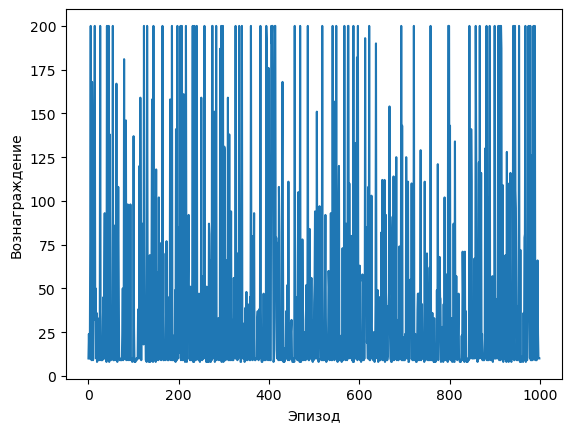

In [18]:

plt.plot(total_rewards)
plt.xlabel('Эпизод')
plt.ylabel('Вознаграждение')
plt.show()

In [19]:
total_rewards = []
best_total_reward = 0
best_weight = torch.rand(n_state, n_action).float()
noise_scale = 0.01

for num in range(1000):
    weight = best_weight + noise_scale * torch.rand(n_state, n_action).float()
    reward_sum, count_step = run_episode(env, weight, 202)
    if reward_sum > 0:
        if reward_sum >= best_total_reward:
            best_total_reward = reward_sum
            best_weight = weight
            noise_scale = max(noise_scale * 0.5, 0.0001)
            #noise_scale = max(noise_scale - 0.001, 0.0001)
        else:
            noise_scale = min(noise_scale * 2, 2)
            #noise_scale = min(noise_scale + 0.001, 2)
        total_rewards.append(reward_sum)
    else:
        noise_scale = max(noise_scale * 0.5, 0.0001)
        #noise_scale = max(noise_scale - 0.001, 0.0001)

    print('Эпизод {}: {} - step {} - noise {}'.format(num+1, reward_sum, count_step, noise_scale))


Эпизод 1: 8.0 - step 8 - noise 0.005
Эпизод 2: 8.0 - step 8 - noise 0.0025
Эпизод 3: 10.0 - step 10 - noise 0.00125
Эпизод 4: 8.0 - step 8 - noise 0.0025
Эпизод 5: 9.0 - step 9 - noise 0.005
Эпизод 6: 8.0 - step 8 - noise 0.01
Эпизод 7: 9.0 - step 9 - noise 0.02
Эпизод 8: 8.0 - step 8 - noise 0.04
Эпизод 9: 10.0 - step 10 - noise 0.02
Эпизод 10: 9.0 - step 9 - noise 0.04
Эпизод 11: 9.0 - step 9 - noise 0.08
Эпизод 12: 10.0 - step 10 - noise 0.04
Эпизод 13: 9.0 - step 9 - noise 0.08
Эпизод 14: 9.0 - step 9 - noise 0.16
Эпизод 15: 11.0 - step 11 - noise 0.08
Эпизод 16: 9.0 - step 9 - noise 0.16
Эпизод 17: 9.0 - step 9 - noise 0.32
Эпизод 18: 10.0 - step 10 - noise 0.64
Эпизод 19: 8.0 - step 8 - noise 1.28
Эпизод 20: 10.0 - step 10 - noise 2
Эпизод 21: 61.0 - step 61 - noise 1.0
Эпизод 22: 66.0 - step 66 - noise 0.5
Эпизод 23: 73.0 - step 73 - noise 0.25
Эпизод 24: 67.0 - step 67 - noise 0.5
Эпизод 25: 71.0 - step 71 - noise 1.0
Эпизод 26: 177.0 - step 177 - noise 0.5
Эпизод 27: 112.0 - s

In [20]:
sum(total_rewards)/len(total_rewards)

186.107

In [21]:
best_weight

tensor([[7.4265, 5.8508],
        [7.6179, 8.5741],
        [6.7009, 9.6765],
        [5.9003, 7.3419]])

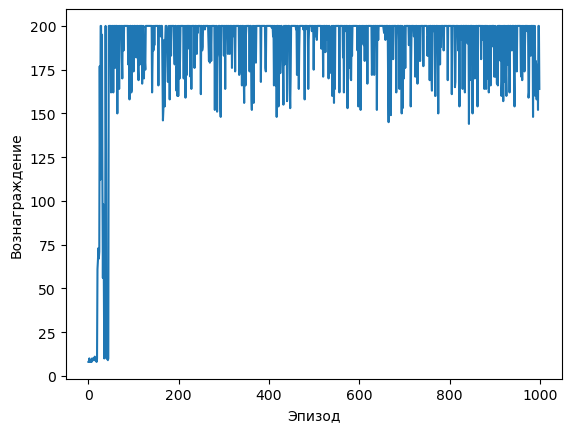

In [22]:
plt.plot(total_rewards)
plt.xlabel('Эпизод')
plt.ylabel('Вознаграждение')
plt.show()

In [23]:
n_episode_eval = 100
total_rewards_eval = []
for episode in range(n_episode_eval):
    total_reward, count_step = run_episode(env, best_weight)
    print('Эпизод {}: {}'.format(episode+1, total_reward))
    if total_reward > 0:
        total_rewards_eval.append(total_reward)

Эпизод 1: 200.0
Эпизод 2: 170.0
Эпизод 3: 200.0
Эпизод 4: 200.0
Эпизод 5: 200.0
Эпизод 6: 166.0
Эпизод 7: 182.0
Эпизод 8: 170.0
Эпизод 9: 200.0
Эпизод 10: 200.0
Эпизод 11: 168.0
Эпизод 12: 200.0
Эпизод 13: 170.0
Эпизод 14: 200.0
Эпизод 15: 184.0
Эпизод 16: 200.0
Эпизод 17: 200.0
Эпизод 18: 200.0
Эпизод 19: 200.0
Эпизод 20: 200.0
Эпизод 21: 200.0
Эпизод 22: 200.0
Эпизод 23: 197.0
Эпизод 24: 200.0
Эпизод 25: 200.0
Эпизод 26: 200.0
Эпизод 27: 200.0
Эпизод 28: 200.0
Эпизод 29: 200.0
Эпизод 30: 172.0
Эпизод 31: 186.0
Эпизод 32: 200.0
Эпизод 33: 200.0
Эпизод 34: 200.0
Эпизод 35: 156.0
Эпизод 36: 188.0
Эпизод 37: 200.0
Эпизод 38: 200.0
Эпизод 39: 168.0
Эпизод 40: 146.0
Эпизод 41: 200.0
Эпизод 42: 200.0
Эпизод 43: 200.0
Эпизод 44: 200.0
Эпизод 45: 200.0
Эпизод 46: 200.0
Эпизод 47: 173.0
Эпизод 48: 174.0
Эпизод 49: 200.0
Эпизод 50: 200.0
Эпизод 51: 200.0
Эпизод 52: 200.0
Эпизод 53: 200.0
Эпизод 54: 156.0
Эпизод 55: 178.0
Эпизод 56: 200.0
Эпизод 57: 200.0
Эпизод 58: 200.0
Эпизод 59: 191.0
Эпизод

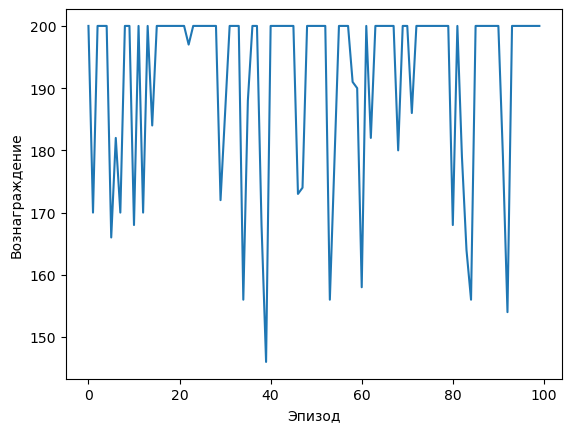

In [24]:
plt.plot(total_rewards_eval)
plt.xlabel('Эпизод')
plt.ylabel('Вознаграждение')
plt.show()

In [36]:
state = env.reset()[0]
state = torch.from_numpy(state).float()
print(state)
print(best_weight)
z = torch.matmul(state, best_weight)#вероятности действия
print("Z ",z)
probs = torch.nn.Softmax()(z)#производные вероятностей действия
print("Softmax(Z) ", probs)
action = int(torch.bernoulli(probs[1]).item())
print(action)
d_softmax = torch.diag(probs) - probs.view(-1, 1) * probs
print("d_softmax ", d_softmax)
d_log = d_softmax[action] / probs[action]
print(d_log)
grad = state.view(-1, 1) * d_log
print(grad)

tensor([-0.0475, -0.0407, -0.0280,  0.0475])
tensor([[7.4265, 5.8508],
        [7.6179, 8.5741],
        [6.7009, 9.6765],
        [5.9003, 7.3419]])
Z  tensor([-0.5705, -0.5495])
Softmax(Z)  tensor([0.4947, 0.5053])
0
d_softmax  tensor([[ 0.2500, -0.2500],
        [-0.2500,  0.2500]])
tensor([ 0.5053, -0.5053])
tensor([[-0.0240,  0.0240],
        [-0.0205,  0.0205],
        [-0.0142,  0.0142],
        [ 0.0240, -0.0240]])


In [37]:
def run_episode_strategy(env, weight):
    state = env.reset()[0]
    grads = []
    reward_sum = 0
    is_done = False
    is_break = False

    while not is_done and not is_break:
        state = torch.from_numpy(state).float()
        z = torch.matmul(state, weight)#вероятности действия
        probs = torch.nn.Softmax()(z)#производные вероятностей действия
        action = int(torch.bernoulli(probs[1]).item())

        d_softmax = torch.diag(probs) - probs.view(-1, 1) * probs
        d_log = d_softmax[action] / probs[action]

        grad = state.view(-1, 1) * d_log
        grads.append(grad)

        state, reward, is_done, is_break, _ = env.step(action)
        reward_sum += reward
        
    
    return reward_sum, grads

In [48]:
total_rewards = []
weight = torch.rand(n_state, n_action).float()
learning_rate = 0.001

for num in range(1000):
    reward_sum, grads = run_episode_strategy(env, weight)
    print('Эпизод {}: {} '.format(num+1, reward_sum))
    for i, grad in enumerate(grads):
        weight += learning_rate * grad * (reward_sum - i)
    
    total_rewards.append(reward_sum)




Эпизод 1: 24.0 
Эпизод 2: 19.0 
Эпизод 3: 15.0 
Эпизод 4: 24.0 
Эпизод 5: 12.0 
Эпизод 6: 15.0 
Эпизод 7: 26.0 
Эпизод 8: 43.0 
Эпизод 9: 29.0 
Эпизод 10: 53.0 
Эпизод 11: 23.0 
Эпизод 12: 23.0 
Эпизод 13: 44.0 
Эпизод 14: 27.0 
Эпизод 15: 23.0 
Эпизод 16: 74.0 
Эпизод 17: 45.0 
Эпизод 18: 20.0 
Эпизод 19: 51.0 
Эпизод 20: 20.0 
Эпизод 21: 51.0 
Эпизод 22: 17.0 
Эпизод 23: 66.0 
Эпизод 24: 24.0 
Эпизод 25: 56.0 
Эпизод 26: 14.0 
Эпизод 27: 35.0 
Эпизод 28: 27.0 
Эпизод 29: 50.0 
Эпизод 30: 60.0 
Эпизод 31: 29.0 
Эпизод 32: 20.0 
Эпизод 33: 29.0 
Эпизод 34: 44.0 
Эпизод 35: 27.0 
Эпизод 36: 76.0 
Эпизод 37: 35.0 
Эпизод 38: 68.0 
Эпизод 39: 33.0 
Эпизод 40: 54.0 
Эпизод 41: 24.0 
Эпизод 42: 60.0 
Эпизод 43: 43.0 
Эпизод 44: 37.0 
Эпизод 45: 56.0 
Эпизод 46: 54.0 
Эпизод 47: 56.0 
Эпизод 48: 59.0 
Эпизод 49: 52.0 
Эпизод 50: 39.0 
Эпизод 51: 30.0 
Эпизод 52: 66.0 
Эпизод 53: 23.0 
Эпизод 54: 56.0 
Эпизод 55: 50.0 
Эпизод 56: 37.0 
Эпизод 57: 46.0 
Эпизод 58: 60.0 
Эпизод 59: 17.0 
Эпизод

In [49]:
weight

tensor([[-0.3356,  1.0228],
        [ 0.5268,  0.0374],
        [-1.7174,  3.1035],
        [-7.5979,  9.1425]])

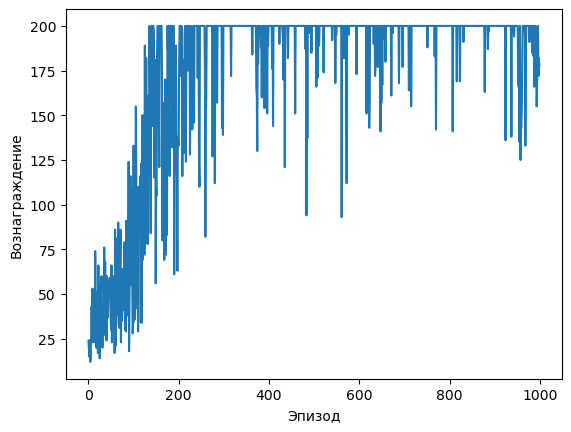

In [50]:
plt.plot(total_rewards)
plt.xlabel('Эпизод')
plt.ylabel('Вознаграждение')
plt.show()

In [51]:
n_episode_eval = 100
total_rewards_eval = []
for episode in range(n_episode_eval):
    total_reward, count_step = run_episode(env, best_weight)
    print('Эпизод {}: {}'.format(episode+1, total_reward))
    if total_reward > 0:
        total_rewards_eval.append(total_reward)

Эпизод 1: 184.0
Эпизод 2: 200.0
Эпизод 3: 192.0
Эпизод 4: 200.0
Эпизод 5: 200.0
Эпизод 6: 181.0
Эпизод 7: 200.0
Эпизод 8: 200.0
Эпизод 9: 144.0
Эпизод 10: 200.0
Эпизод 11: 200.0
Эпизод 12: 200.0
Эпизод 13: 192.0
Эпизод 14: 200.0
Эпизод 15: 174.0
Эпизод 16: 200.0
Эпизод 17: 200.0
Эпизод 18: 172.0
Эпизод 19: 200.0
Эпизод 20: 200.0
Эпизод 21: 164.0
Эпизод 22: 180.0
Эпизод 23: 200.0
Эпизод 24: 200.0
Эпизод 25: 200.0
Эпизод 26: 200.0
Эпизод 27: 200.0
Эпизод 28: 152.0
Эпизод 29: 200.0
Эпизод 30: 200.0
Эпизод 31: 200.0
Эпизод 32: 196.0
Эпизод 33: 148.0
Эпизод 34: 200.0
Эпизод 35: 194.0
Эпизод 36: 200.0
Эпизод 37: 192.0
Эпизод 38: 200.0
Эпизод 39: 172.0
Эпизод 40: 158.0
Эпизод 41: 196.0
Эпизод 42: 200.0
Эпизод 43: 200.0
Эпизод 44: 172.0
Эпизод 45: 200.0
Эпизод 46: 168.0
Эпизод 47: 200.0
Эпизод 48: 200.0
Эпизод 49: 200.0
Эпизод 50: 200.0
Эпизод 51: 200.0
Эпизод 52: 158.0
Эпизод 53: 179.0
Эпизод 54: 200.0
Эпизод 55: 174.0
Эпизод 56: 150.0
Эпизод 57: 200.0
Эпизод 58: 167.0
Эпизод 59: 194.0
Эпизод

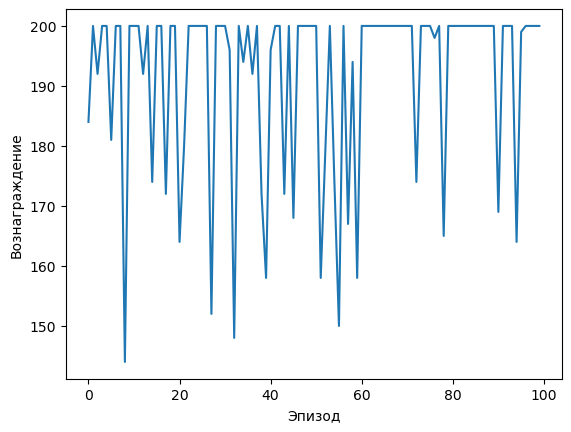

In [52]:
plt.plot(total_rewards_eval)
plt.xlabel('Эпизод')
plt.ylabel('Вознаграждение')
plt.show()